In [1]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False
     

In [2]:


df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv', index_col=0, parse_dates=True)

In [3]:
df.head()

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.0,7.000000,5.3,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.0,6.666667,5.2,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.0,6.333333,5.1,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.0,6.000000,5.0,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_out        19735 non-null  float64
 3   Press_mm_hg  19735 non-null  float64
 4   RH_out       19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Tdewpoint    19735 non-null  float64
 7   Visibility   19735 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.4 MB


In [5]:

df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [6]:
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
df = df.resample('1h').mean()


In [9]:

df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,5.050000,53.416667
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,4.658333,40.000000
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,4.391667,40.000000
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,4.016667,40.000000
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,3.816667,40.000000
...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,21.916667,755.800000,59.000000,2.000000,13.475000,21.583333
2016-05-27 15:00:00,76.666667,0.000000,22.216667,755.675000,57.333333,2.000000,13.258333,21.833333
2016-05-27 16:00:00,135.000000,0.000000,22.883333,755.375000,55.000000,2.416667,13.283333,22.583333


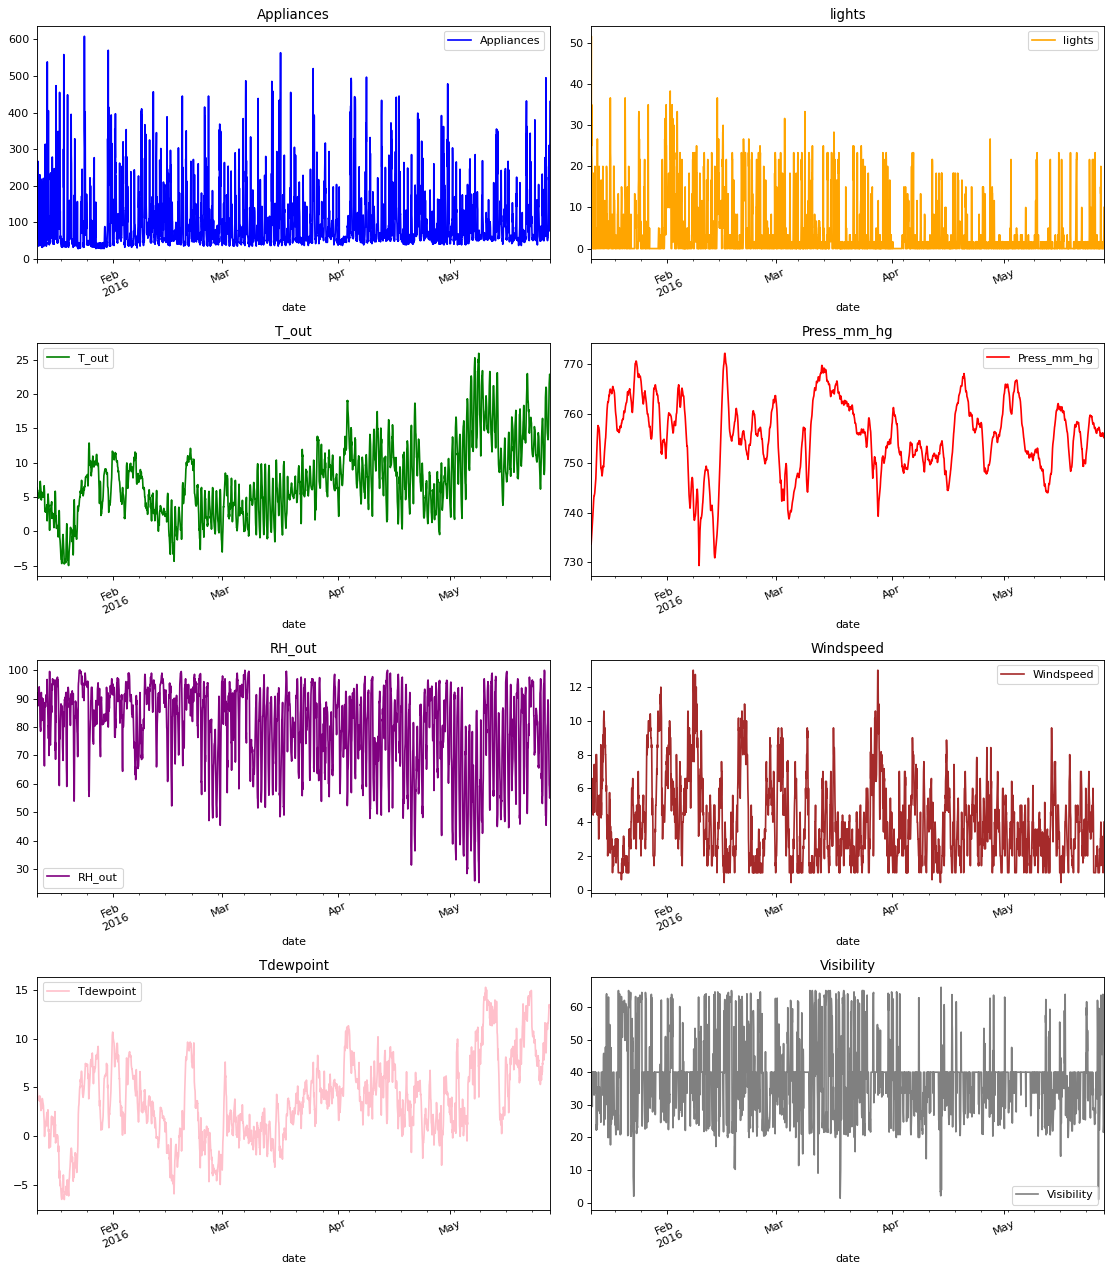

In [10]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [11]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is Stationary
T_out - Series is Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is Stationary
Windspeed - Series is Stationary
Tdewpoint - Series is Stationary
Visibility - Series is Stationary


In [33]:
from statsmodels.tsa.stattools import kpss
for i in range (len(df.columns)):
    result = kpss(df[df.columns[i]])
    if result[1] < 0.05 :
     print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
     print('{} - Series is Stationary'.format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is not Stationary
T_out - Series is not Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is not Stationary
Windspeed - Series is not Stationary
Tdewpoint - Series is not Stationary
Visibility - Series is not Stationary


C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[df.columns[i]])
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2784506942.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-

In [35]:
from statsmodels.tsa.stattools import kpss

for col in df.columns:
    result = kpss(df[col], regression="c", nlags="auto")  
    p_value = result[1]  # Récupération explicite de la p-value

    if p_value < 0.05:  
        print(f"{col} - Series is NOT stationary (p-value = {p_value:.5f})")
    else:
        print(f"{col} - Series is Stationary (p-value = {p_value:.5f})")


Appliances - Series is Stationary (p-value = 0.10000)
lights - Series is NOT stationary (p-value = 0.01000)
T_out - Series is NOT stationary (p-value = 0.01000)
Press_mm_hg - Series is Stationary (p-value = 0.10000)
RH_out - Series is NOT stationary (p-value = 0.01000)
Windspeed - Series is NOT stationary (p-value = 0.01000)
Tdewpoint - Series is NOT stationary (p-value = 0.01000)
Visibility - Series is NOT stationary (p-value = 0.01000)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2066987296.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2066987296.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2066987296.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\2066987296.py:4: InterpolationWarning: The test statistic is outside of the ran

In [37]:
df_diff = df.diff().dropna()  # Différenciation de premier ordre


In [39]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is Stationary
T_out - Series is Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is Stationary
Windspeed - Series is Stationary
Tdewpoint - Series is Stationary
Visibility - Series is Stationary


In [41]:
for col in df.columns:
    result = kpss(df[col], regression="c", nlags="auto")  
    p_value = result[1]  # Récupération explicite de la p-value

    if p_value < 0.05:  
        print(f"{col} - Series is NOT stationary (p-value = {p_value:.5f})")
    else:
        print(f"{col} - Series is Stationary (p-value = {p_value:.5f})")

Appliances - Series is Stationary (p-value = 0.10000)
lights - Series is NOT stationary (p-value = 0.01000)
T_out - Series is NOT stationary (p-value = 0.01000)
Press_mm_hg - Series is Stationary (p-value = 0.10000)
RH_out - Series is NOT stationary (p-value = 0.01000)
Windspeed - Series is NOT stationary (p-value = 0.01000)
Tdewpoint - Series is NOT stationary (p-value = 0.01000)
Visibility - Series is NOT stationary (p-value = 0.01000)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range o

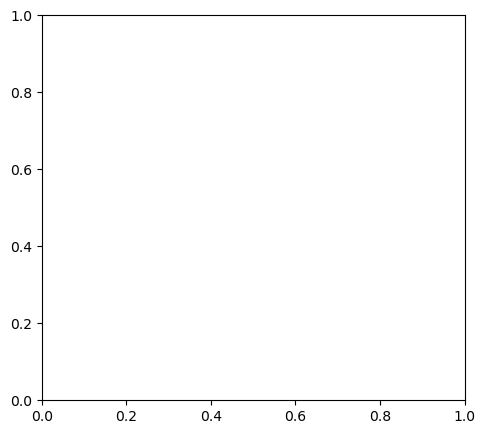

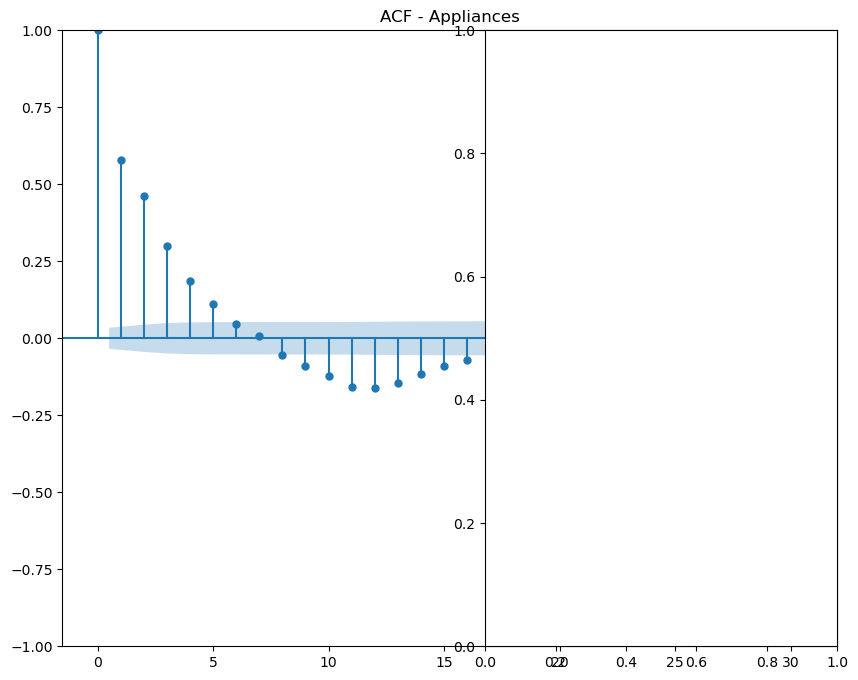

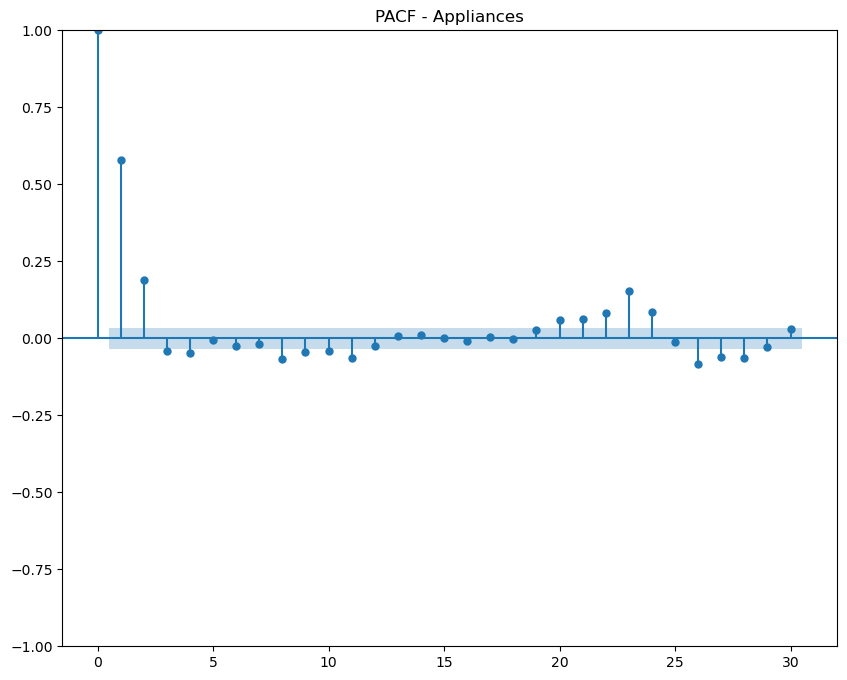

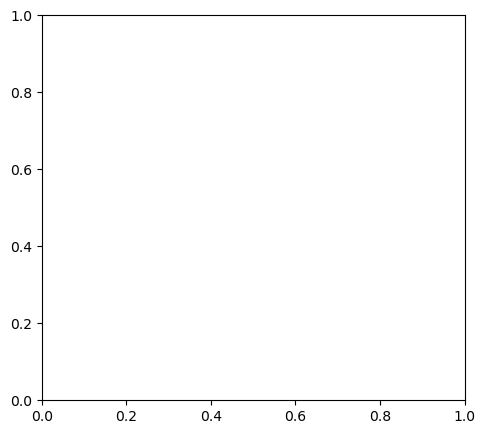

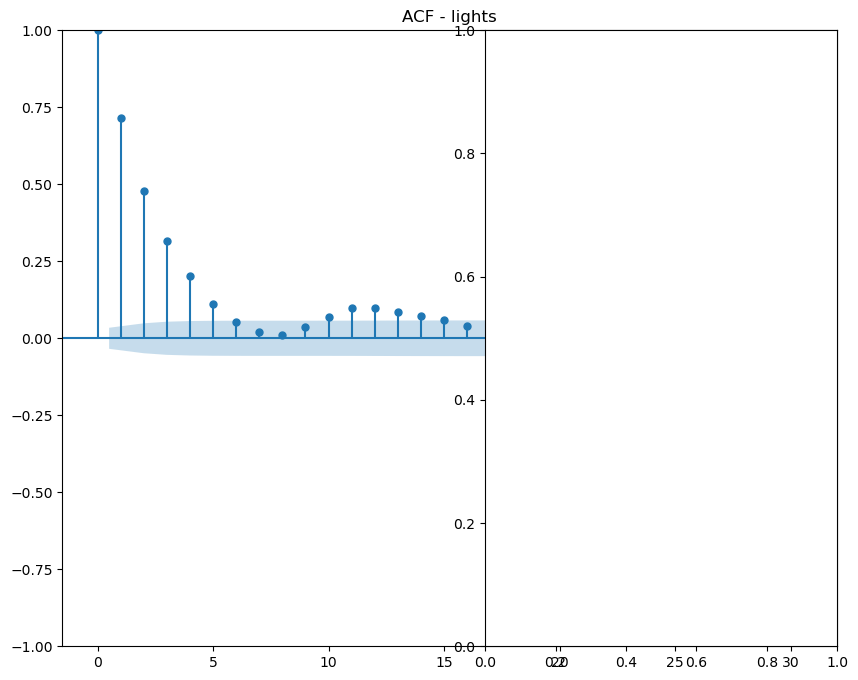

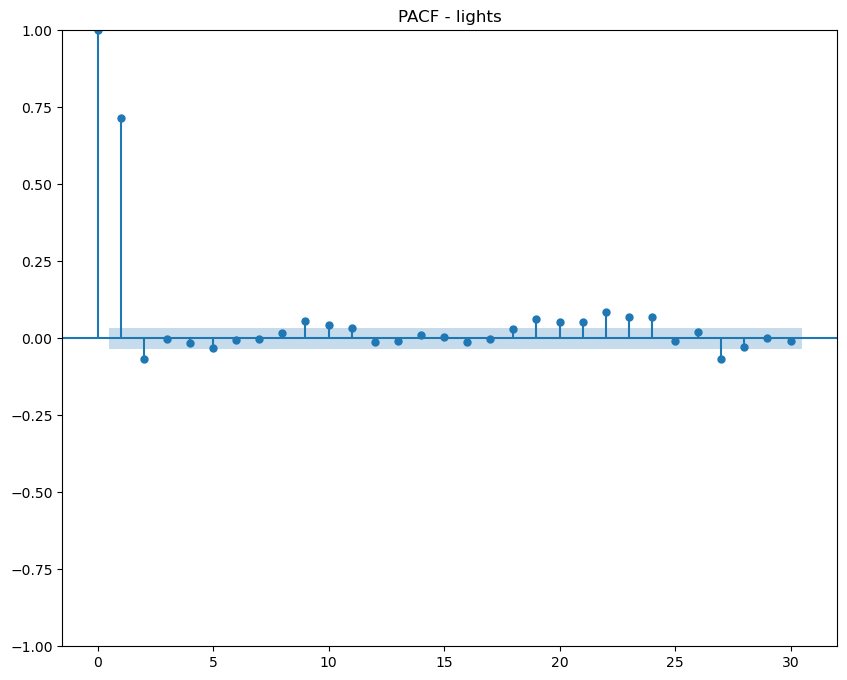

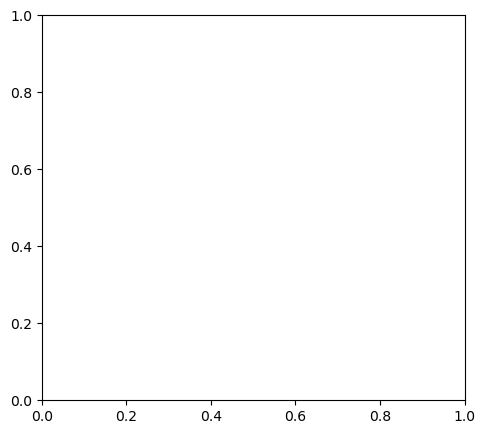

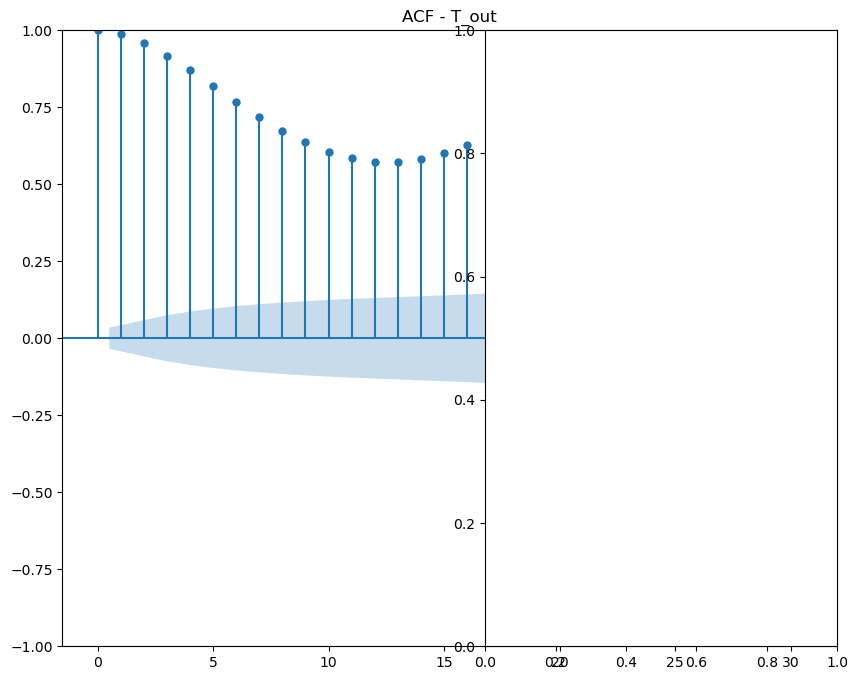

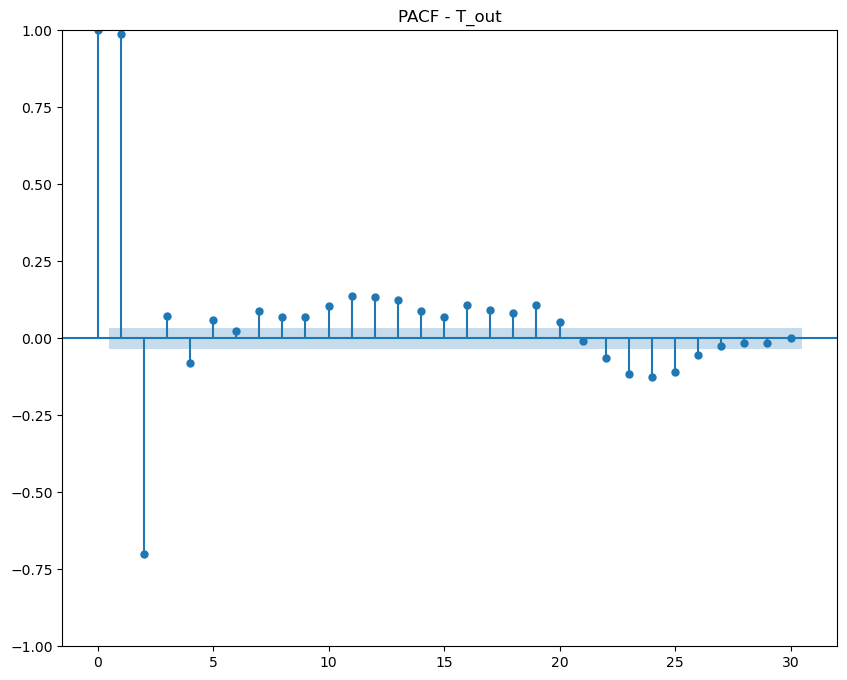

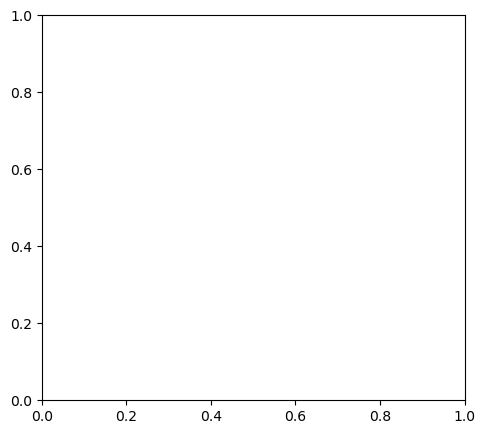

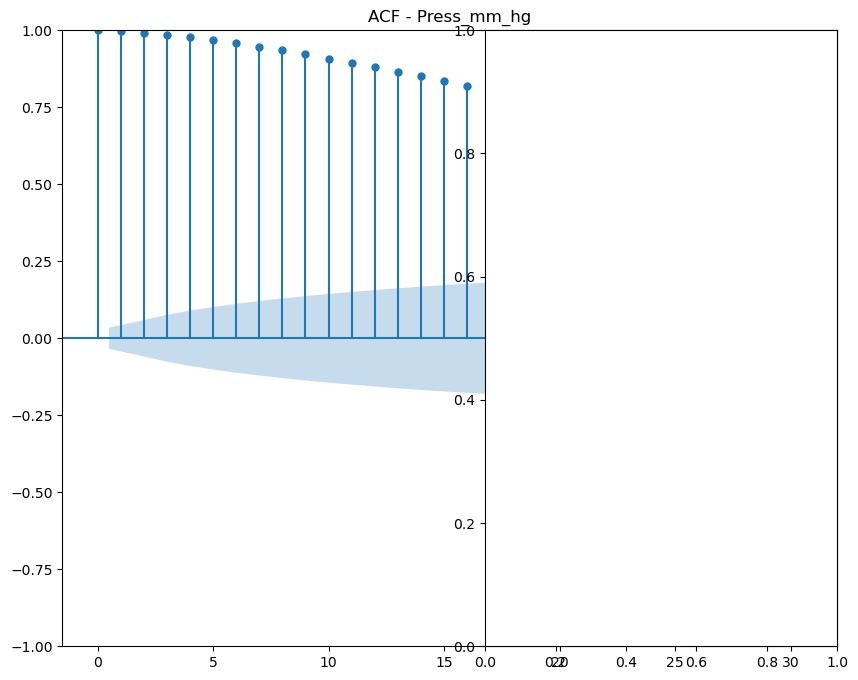

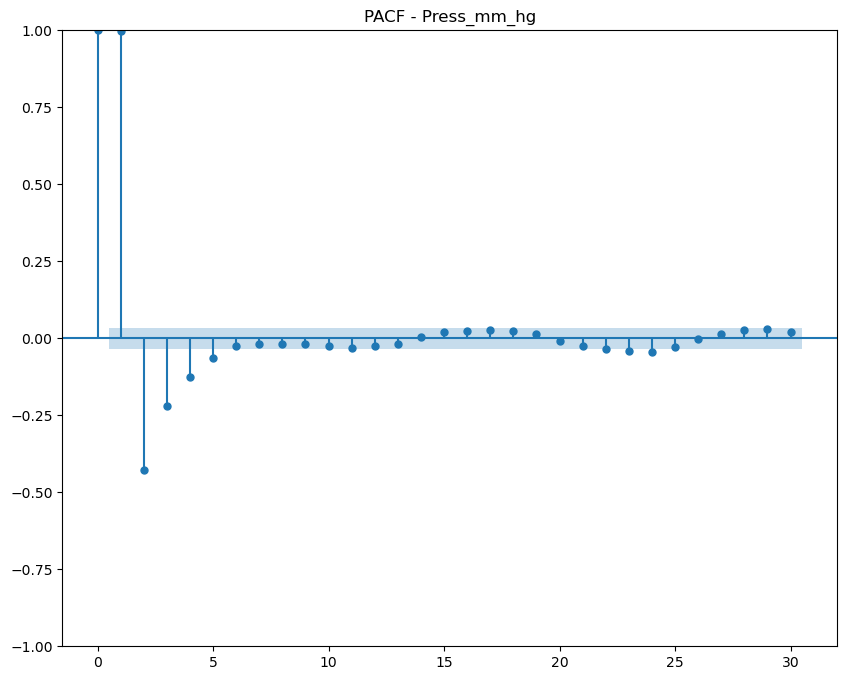

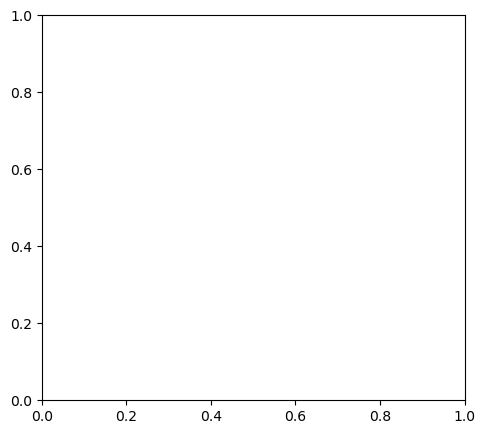

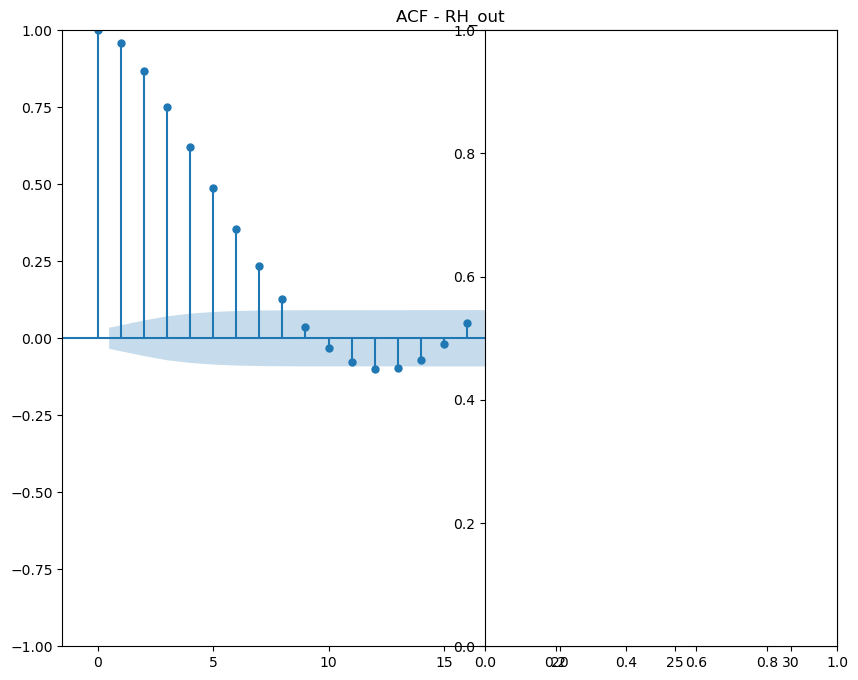

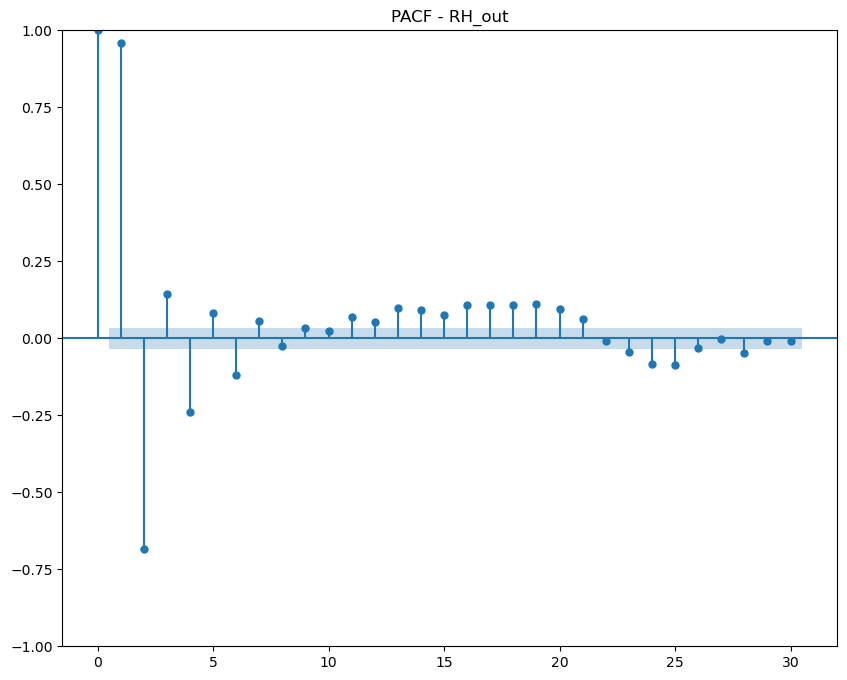

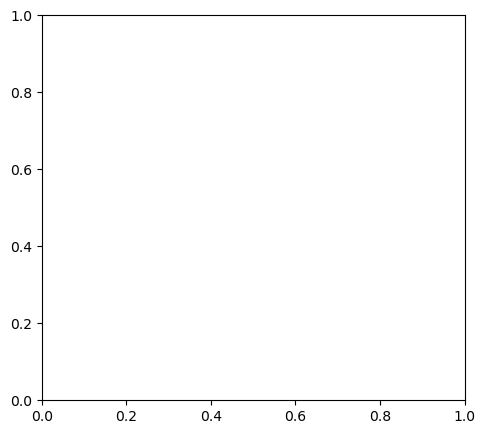

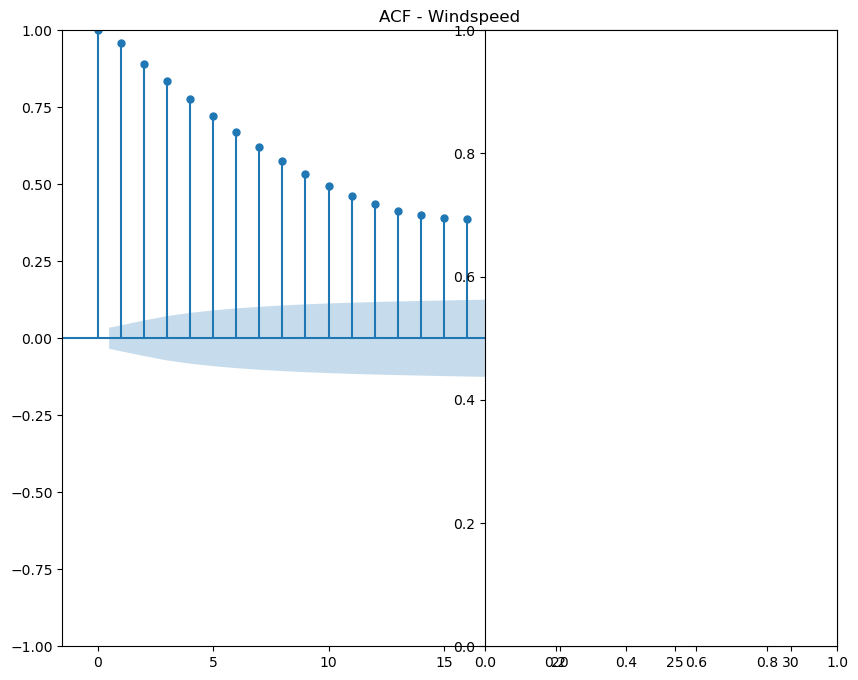

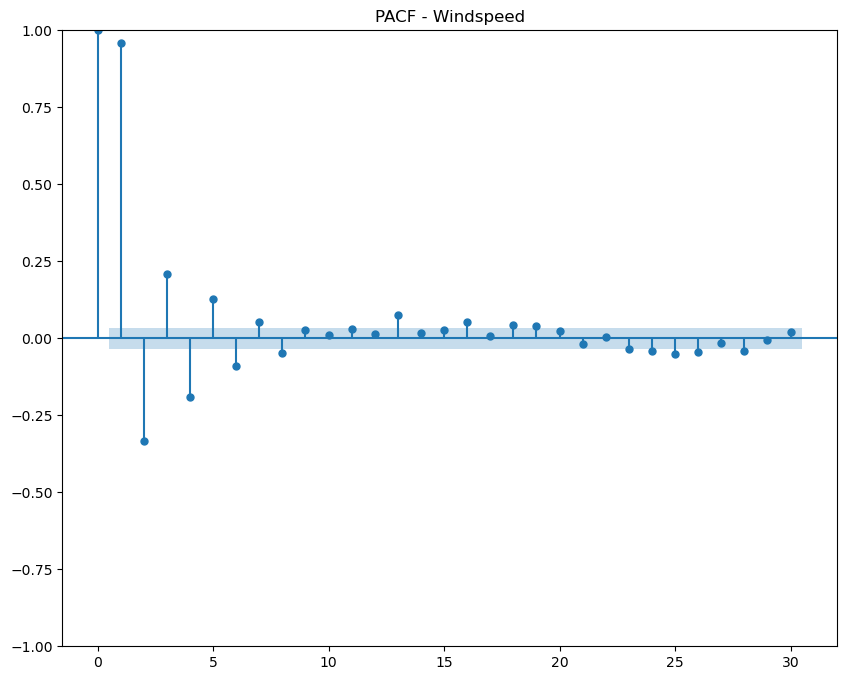

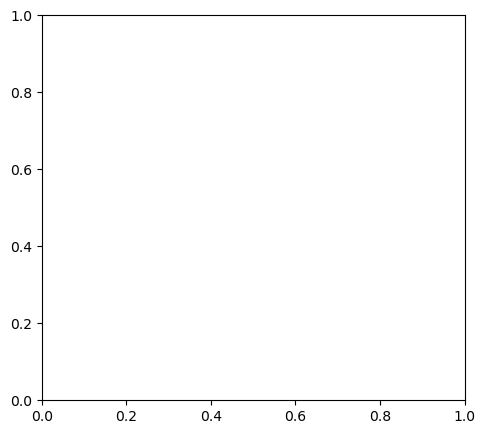

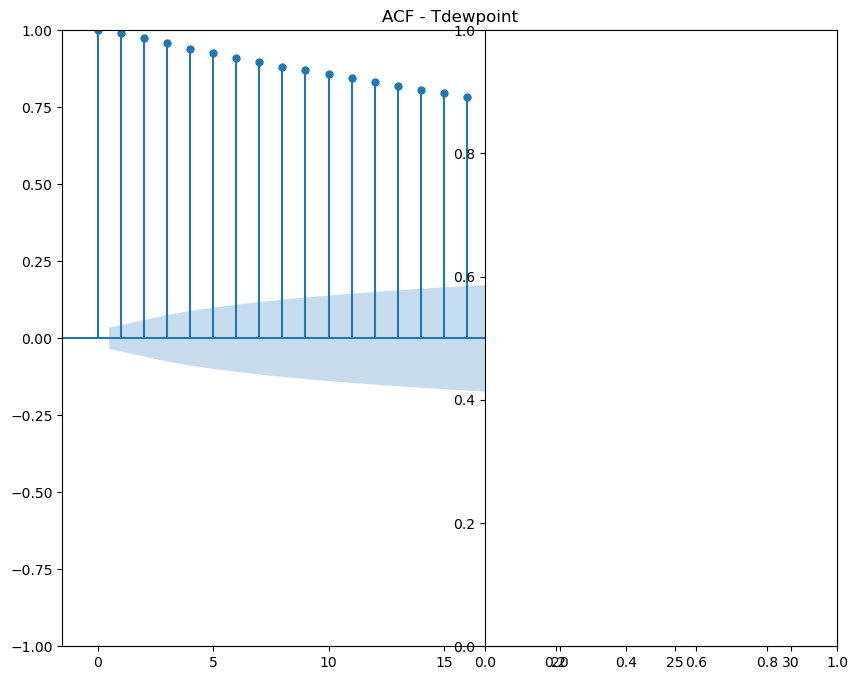

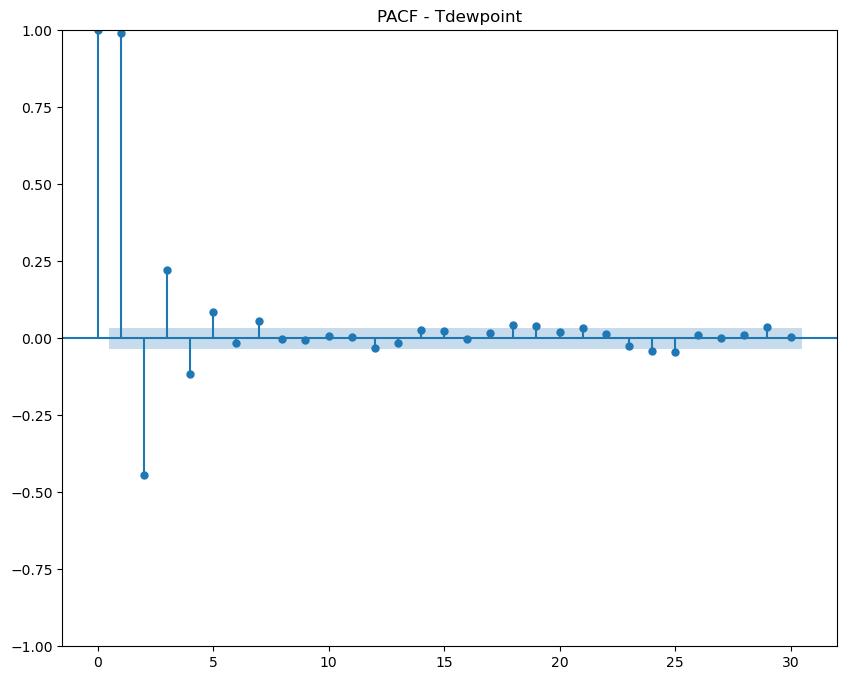

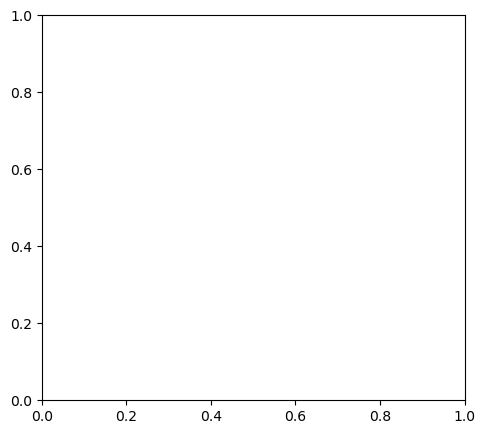

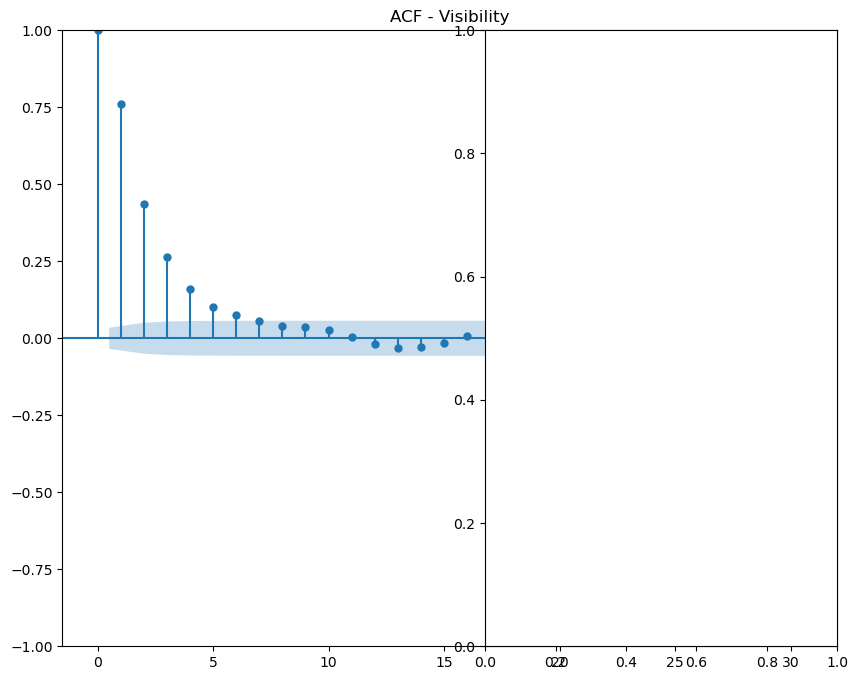

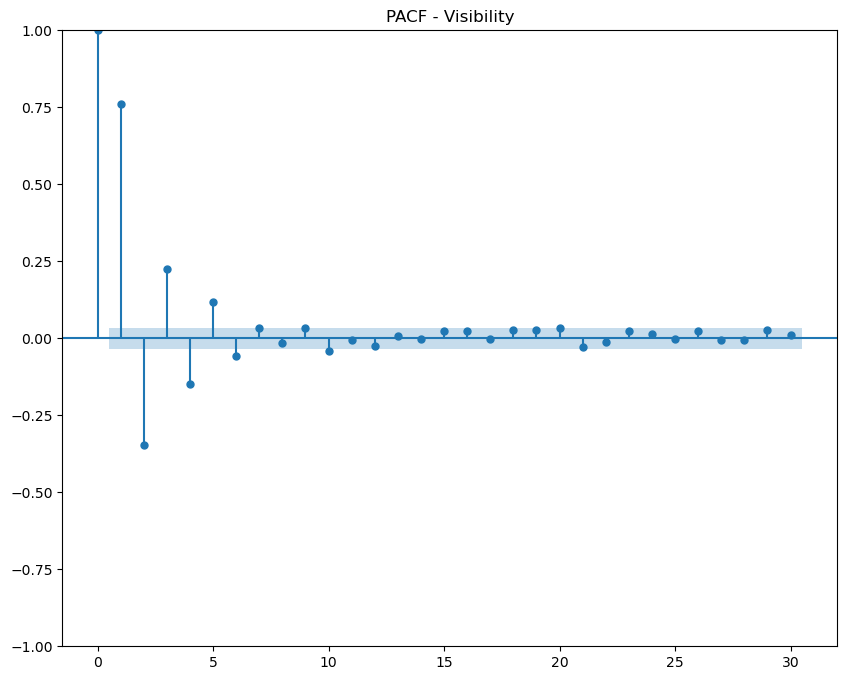

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_acf(df[col].dropna(), lags=30, title=f"ACF - {col}")
    plt.subplot(1, 2, 2)
    plot_pacf(df[col].dropna(), lags=30, title=f"PACF - {col}")
    plt.show()


In [44]:
df = df.diff().diff().dropna()


In [45]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is Stationary
T_out - Series is Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is Stationary
Windspeed - Series is Stationary
Tdewpoint - Series is Stationary
Visibility - Series is Stationary


In [46]:
for col in df.columns:
    result = kpss(df[col], regression="c", nlags="auto")  
    p_value = result[1]  # Récupération explicite de la p-value

    if p_value < 0.05:  
        print(f"{col} - Series is NOT stationary (p-value = {p_value:.5f})")
    else:
        print(f"{col} - Series is Stationary (p-value = {p_value:.5f})")

Appliances - Series is Stationary (p-value = 0.10000)
lights - Series is Stationary (p-value = 0.10000)
T_out - Series is Stationary (p-value = 0.10000)
Press_mm_hg - Series is Stationary (p-value = 0.10000)
RH_out - Series is Stationary (p-value = 0.10000)
Windspeed - Series is Stationary (p-value = 0.10000)
Tdewpoint - Series is Stationary (p-value = 0.10000)
Visibility - Series is Stationary (p-value = 0.10000)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df[col], regression="c", nlags="auto")
C:\Users\rtekem\AppData\Local\Temp\ipykernel_21732\415161453.py:2: InterpolationWarning: The test statistic is outside of the range o

# on continue le projet

In [48]:

df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv', index_col=0, parse_dates=True)

In [49]:

df=df.resample('1h').mean()

In [50]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is Stationary
T_out - Series is Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is Stationary
Windspeed - Series is Stationary
Tdewpoint - Series is Stationary
Visibility - Series is Stationary


In [51]:

max_lags=8
y='Appliances'

In [52]:

for i in range(len(df.columns)-1):
  results=grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Column - lights : P_Values - [0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006, 0.0012]
Column - T_out : P_Values - [0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Press_mm_hg : P_Values - [0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0, 0.0]
Column - RH_out : P_Values - [0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Windspeed : P_Values - [0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009, 0.0002]
Column - Tdewpoint : P_Values - [0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992, 0.1152]
Column - Visibility : P_Values - [0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521, 0.3465]


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [127]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [129]:
grangers_causation_matrix(df, variables = df.columns)  

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\st

,Appliances_x,lights_x,T_out_x,Press_mm_hg_x,RH_out_x,Windspeed_x,Tdewpoint_x,Visibility_x
Appliances_y,1.0000,0.0001,0.0000,0.0000,0.0000,0.0002,0.0009,0.2488
lights_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0861,0.0488
T_out_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.4923
Press_mm_hg_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0001,0.0742
RH_out_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0003,0.0000,0.1143
Windspeed_y,0.0000,0.0244,0.0000,0.0000,0.0000,1.0000,0.0010,0.0723
Tdewpoint_y,0.0599,0.0010,0.0000,0.0000,0.0000,0.0000,1.0000,0.2747
Visibility_y,0.4381,0.0240,0.0243,0.1097,0.0511,0.4141,0.0849,1.0000


In [53]:

df_input=df[['Appliances','T_out','Windspeed']]

In [54]:

df_input

,Appliances,T_out,Windspeed
date,,,
2016-01-11 17:00:00,55.000000,6.308333,6.166667
2016-01-11 18:00:00,176.666667,5.941667,5.416667
2016-01-11 19:00:00,173.333333,6.000000,6.000000
2016-01-11 20:00:00,125.000000,6.000000,6.000000
2016-01-11 21:00:00,103.333333,5.833333,6.000000
...,...,...,...
2016-05-27 14:00:00,101.666667,21.916667,2.000000
2016-05-27 15:00:00,76.666667,22.216667,2.000000
2016-05-27 16:00:00,135.000000,22.883333,2.416667


In [55]:

df_train = df_input[:int(0.9*(len(df_input)))]
df_test = df_input[int(0.9*(len(df_input))):]

In [56]:

df_train.shape

(2961, 3)

In [59]:

df_test.shape

(329, 3)

In [60]:
df_input.shape

(3290, 3)

In [61]:

model = VAR(df_train, freq="1H")
for i in range(48):
    results = model.fit(i+1)
    print('Order = ', i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = to_offset(freq)


Order =  1
AIC:  7.126785098024289
BIC:  7.151080819162065
Order =  2
AIC:  6.13876916892782
BIC:  6.181298651759994
Order =  3
AIC:  6.019982255185911
BIC:  6.080755770837745
Order =  4
AIC:  5.960526790759722
BIC:  6.03955461973309
Order =  5
AIC:  5.90806966783707
BIC:  6.005362100022208
Order =  6
AIC:  5.891197292905782
BIC:  6.006764627593054
Order =  7
AIC:  5.852250355011839
BIC:  5.986102900903521
Order =  8
AIC:  5.841915871050663
BIC:  5.99406394627274
Order =  9
AIC:  5.827889041110309
BIC:  5.998342973224303
Order =  10
AIC:  5.825120732509795
BIC:  6.013890858524602
Order =  11
AIC:  5.791083147024334
BIC:  5.998179813408081
Order =  12
AIC:  5.78322849534456
BIC:  6.008662058036488
Order =  13
AIC:  5.764122425516563
BIC:  6.007903249938919
Order =  14
AIC:  5.754516806234099
BIC:  6.016655267304055
Order =  15
AIC:  5.745057263179904
BIC:  6.025563745321491
Order =  16
AIC:  5.734159567395153
BIC:  6.033044464551212
Order =  17
AIC:  5.734437324119504
BIC:  6.0517110397

In [62]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,13.82,13.83,1.005e+06,13.82
1,7.139,7.163,1260.,7.148
2,6.149,6.192,468.3,6.165
3,6.031,6.093,416.2,6.053
4,5.970,6.050,391.7,5.999
5,5.917,6.015,371.3,5.952
6,5.902,6.019,365.7,5.944
7,5.863,5.999*,351.9,5.912
8,5.852,6.006,348.1,5.908
9,5.837,6.010,342.9,5.900


In [63]:
model = VAR(df_train, freq="1h")
results = model.fit(7)

In [66]:

print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Mar, 2025
Time:                     18:17:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.98610
Nobs:                     2954.00    HQIC:                   5.90043
Log likelihood:          -21152.4    FPE:                    348.017
AIC:                      5.85225    Det(Omega_mle):         340.356
--------------------------------------------------------------------
Results for equation Appliances
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                37.865935         3.448219           10.981           0.000
L1.Appliances         0.451436         0.018470           24.442           0.000
L1.T_out              2.328238         2.534185        

In [67]:
results.params

,Appliances,T_out,Windspeed
const,37.865935,0.231136,0.213512
L1.Appliances,0.451436,0.000246,-0.000340
L1.T_out,2.328238,1.986331,0.251047
L1.Windspeed,2.268735,-0.022509,1.361232
L2.Appliances,0.222279,-0.000193,0.000264
L2.T_out,-4.372626,-1.522224,-0.354257
L2.Windspeed,-1.481847,0.037810,-0.773838
L3.Appliances,-0.019489,-0.000273,-0.000321
L3.T_out,5.606923,0.961124,0.178001
L3.Windspeed,0.184615,-0.042122,0.623610


In [68]:
results.resid

,Appliances,T_out,Windspeed
date,,,
2016-01-12 00:00:00,30.376007,-0.334447,-0.550943
2016-01-12 01:00:00,63.288185,0.372693,0.076125
2016-01-12 02:00:00,-87.434719,-0.212385,-1.003727
2016-01-12 03:00:00,-51.655270,0.094651,0.741380
2016-01-12 04:00:00,-7.545184,0.167324,0.275484
...,...,...,...
2016-05-13 21:00:00,-57.027620,-0.512698,-0.799785
2016-05-13 22:00:00,-2.397213,0.067144,1.474201
2016-05-13 23:00:00,12.750715,0.313479,0.616710


In [69]:
lag=results.k_ar

In [72]:

results.forecast(df_train.values[-lag:],steps=5)

array([[44.34598018,  8.92651619,  3.99333186],
       [33.70923187,  8.81719814,  4.13871016],
       [38.32344216,  9.01953267,  4.188856  ],
       [53.39756915,  9.3356185 ,  4.31429082],
       [60.93798924,  9.56974211,  4.40093836]])

In [73]:

df_test[0:5]
     

,Appliances,T_out,Windspeed
date,,,
2016-05-14 02:00:00,60.000000,8.891667,3.166667
2016-05-14 03:00:00,60.000000,8.725000,2.833333
2016-05-14 04:00:00,60.000000,8.775000,4.416667
2016-05-14 05:00:00,56.666667,8.683333,5.000000
2016-05-14 06:00:00,63.333333,8.716667,5.000000


In [74]:

df_coeff=pd.DataFrame([results.params['Appliances'],results.pvalues['Appliances']]).T

In [75]:

df_coeff

,Appliances,Appliances
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [76]:

df_coeff.columns = ['coeff','pval']

In [79]:
df_coeff

,coeff,pval
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [85]:
df_coeff.query('pval < 0.05')
np.where(df_coeff['pval'] < 0.05,1, 0)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [88]:

df_coeff['valid']=np.where(df_coeff['pval'] < 0.05,1, 0)

In [89]:
df_coeff

,coeff,pval,valid
const,37.865935,4.701032e-28,1
L1.Appliances,0.451436,6.138160e-132,1
L1.T_out,2.328238,3.582355e-01,0
L1.Windspeed,2.268735,2.564126e-01,0
L2.Appliances,0.222279,4.255512e-28,1
L2.T_out,-4.372626,4.302427e-01,0
L2.Windspeed,-1.481847,6.603327e-01,0
L3.Appliances,-0.019489,3.454670e-01,0
L3.T_out,5.606923,3.952787e-01,0
L3.Windspeed,0.184615,9.598961e-01,0


In [90]:

#coeff_arr=np.multiply(df_coeff['coeff'], df_coeff['valid'])[1:].values
coeff_arr=df_coeff['coeff'][1:].values

In [91]:

coeff_arr.shape

(21,)

In [93]:

coeff_arr

array([ 0.45143647,  2.32823846,  2.26873466,  0.2222793 , -4.37262576,
       -1.48184722, -0.01948858,  5.60692324,  0.18461514, -0.04369054,
       -5.43530357, -0.08685622,  0.00738616,  5.17191268, -1.99030973,
       -0.01683822,  3.22703425,  4.97164661, -0.01091878, -6.77733848,
       -2.97259279])

In [94]:
df_train[-lag:]

,Appliances,T_out,Windspeed
date,,,
2016-05-13 19:00:00,208.333333,19.333333,9.000000
2016-05-13 20:00:00,120.000000,17.066667,8.166667
2016-05-13 21:00:00,63.333333,14.116667,6.583333
2016-05-13 22:00:00,55.000000,11.850000,6.833333
2016-05-13 23:00:00,61.666667,10.466667,7.583333
2016-05-14 00:00:00,58.333333,9.791667,5.750000
2016-05-14 01:00:00,63.333333,9.333333,4.000000


In [95]:

in_arr=df_train[-lag:][::-1].stack().to_frame().T.values

In [96]:

in_arr.shape

(1, 21)

In [97]:

in_arr

array([[ 63.33333333,   9.33333333,   4.        ,  58.33333333,
          9.79166667,   5.75      ,  61.66666667,  10.46666667,
          7.58333333,  55.        ,  11.85      ,   6.83333333,
         63.33333333,  14.11666667,   6.58333333, 120.        ,
         17.06666667,   8.16666667, 208.33333333,  19.33333333,
          9.        ]])

In [102]:

np.dot(in_arr, coeff_arr)+df_coeff['coeff'][:1].values

array([44.34598018])